# CNN to classify images of plants

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import PIL.Image
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

if tf.test.is_built_with_cuda():
    print("The installed version of TensorFlow includes GPU support.")
    print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
else:
    print("The installed version of TensorFlow does not include GPU support.")

The installed version of TensorFlow includes GPU support.
Num GPUs Available:  1


## Data preparation

In [2]:
IMAGE_SHAPE = (256, 256)
TRAINING_DATA_DIR = '../../assets/images/neural_network/train/'
VALID_DATA_DIR = '../../assets/images/neural_network/validation/'

In [3]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

train_generator = datagen.flow_from_directory(
    TRAINING_DATA_DIR,
    target_size=IMAGE_SHAPE
)

valid_generator = datagen.flow_from_directory(
    VALID_DATA_DIR,
    target_size=IMAGE_SHAPE
)

Found 1327 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [4]:
train_generator.class_indices

{'cactus': 0, 'potato': 1, 'wheat': 2}

## Training CNN model

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', 
                           input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
    ])

In [6]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0

In [7]:
EPOCHS = 30
BATCH_SIZE = 32
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=valid_generator,
                    validation_steps= valid_generator.samples // BATCH_SIZE,
                    verbose=1
                    )

Epoch 1/30
41/41 [==============================] - 24s 500ms/step - loss: 0.9720 - accuracy: 0.5351 - val_loss: 0.8788 - val_accuracy: 0.5625
Epoch 2/30
41/41 [==============================] - 20s 478ms/step - loss: 0.7983 - accuracy: 0.6680 - val_loss: 0.7464 - val_accuracy: 0.6736
Epoch 3/30
41/41 [==============================] - 19s 471ms/step - loss: 0.7139 - accuracy: 0.7027 - val_loss: 0.6804 - val_accuracy: 0.6944
Epoch 4/30
41/41 [==============================] - 19s 460ms/step - loss: 0.6271 - accuracy: 0.7475 - val_loss: 0.6786 - val_accuracy: 0.6944
Epoch 5/30
41/41 [==============================] - 19s 459ms/step - loss: 0.5962 - accuracy: 0.7653 - val_loss: 0.6168 - val_accuracy: 0.7465
Epoch 6/30
41/41 [==============================] - 20s 464ms/step - loss: 0.5479 - accuracy: 0.7876 - val_loss: 0.6271 - val_accuracy: 0.7465
Epoch 7/30
41/41 [==============================] - 19s 472ms/step - loss: 0.4916 - accuracy: 0.8239 - val_loss: 0.5535 - val_accuracy: 0.7917

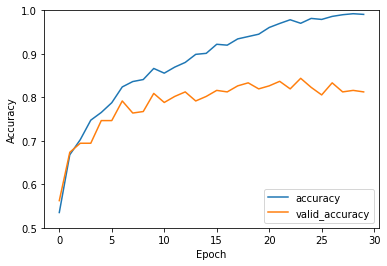

In [8]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
valid_loss = history.history['val_loss']
valid_acc = history.history['val_accuracy']

plt.plot(train_acc, label='accuracy')
plt.plot(valid_acc, label = 'valid_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right');

## Sample predictions

In [9]:
img_path = r"C:\python-projects\ai-project\assets\images\neural_network\validation\potato\images - 2022-05-30T210929.083.jpg"
img = image.load_img(img_path, target_size=IMAGE_SHAPE)

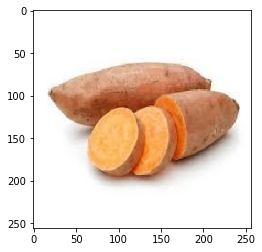

In [10]:
plt.imshow(img);

In [11]:
X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)
prediction = model.predict(X)
np.argmax(prediction, axis=1)

1/1 [==============================] - 0s 398ms/step


array([1], dtype=int64)

Found 300 images belonging to 3 classes.
{'cactus': 0, 'potato': 1, 'wheat': 2}


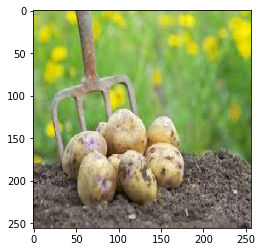

1/1 [==============================] - 0s 12ms/step
Predicted label: [1]
Actual label: [1]


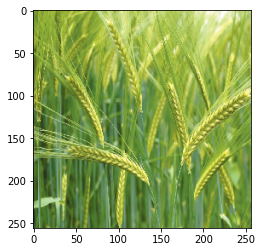

1/1 [==============================] - 0s 13ms/step
Predicted label: [2]
Actual label: [2]


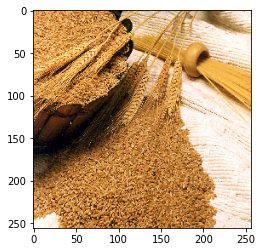

1/1 [==============================] - 0s 13ms/step
Predicted label: [2]
Actual label: [2]


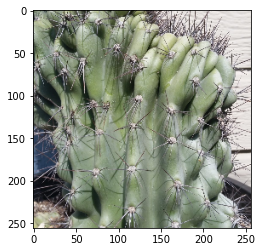

1/1 [==============================] - 0s 12ms/step
Predicted label: [0]
Actual label: [0]


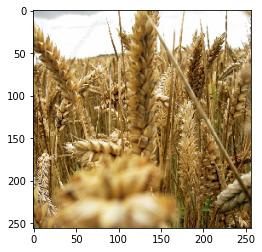

1/1 [==============================] - 0s 13ms/step
Predicted label: [2]
Actual label: [2]


In [13]:
valid_iterator = datagen.flow_from_directory(
    VALID_DATA_DIR,
    target_size=IMAGE_SHAPE,
    batch_size=1
)

print(valid_iterator.class_indices)

for _ in range(5):
    img, label = valid_iterator.next()
    plt.imshow(img[0])
    plt.show()
    single_prediction = model.predict(img)
    print("Predicted label: " + str(np.argmax(single_prediction, axis=1)))
    print("Actual label: " + str(np.argmax(label, axis=1)))

In [14]:
model.save('../../assets/cnn_model')

INFO:tensorflow:Assets written to: ../../assets/cnn_model\assets


INFO:tensorflow:Assets written to: ../../assets/cnn_model\assets
